# Application of Explainable Machine Learning on Prediction

## Dataset: Madelon

*   500 Features
*   2600 Observations
*   Predict class: [1, 2]



### Loading Packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=0649ccd52e868707861c6fa74c3d02381daae79de7b45e5b021547736429836f
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from scipy.stats import uniform, randint
from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import lime
import lime.lime_tabular
import shap

import warnings
warnings.filterwarnings('ignore')

### Data Cleaning

In [ ]:
# Load the data
madelon = pd.read_csv('madelon.csv')
madelon.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V492,V493,V494,V495,V496,V497,V498,V499,V500,class
0,0,485.0,477.0,537.0,479.0,452.0,471.0,491.0,476.0,475.0,...,481.0,477.0,485.0,511.0,485.0,481.0,479.0,475.0,496.0,2
1,1,483.0,458.0,460.0,487.0,587.0,475.0,526.0,479.0,485.0,...,478.0,487.0,338.0,513.0,486.0,483.0,492.0,510.0,517.0,2
2,2,487.0,542.0,499.0,468.0,448.0,471.0,442.0,478.0,480.0,...,481.0,492.0,650.0,506.0,501.0,480.0,489.0,499.0,498.0,2
3,3,480.0,491.0,510.0,485.0,495.0,472.0,417.0,474.0,502.0,...,480.0,474.0,572.0,454.0,469.0,475.0,482.0,494.0,461.0,1
4,4,484.0,502.0,528.0,489.0,466.0,481.0,402.0,478.0,487.0,...,479.0,452.0,435.0,486.0,508.0,481.0,504.0,495.0,511.0,1


In [ ]:
madelon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Columns: 501 entries, V1 to class
dtypes: float64(500), int64(1)
memory usage: 9.9 MB


In [ ]:
madelon.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V492,V493,V494,V495,V496,V497,V498,V499,V500,class
count,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,...,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000
mean,481.742308,483.551154,509.338846,483.364615,500.925769,479.351923,480.488462,476.569615,487.016154,478.806538,...,478.803462,486.250769,497.734615,493.812308,510.731538,478.151154,483.157308,508.436538,490.588077,0.500000
std,6.312905,30.338955,38.798710,8.943204,41.356829,6.896949,40.428218,1.391642,15.277242,7.308349,...,4.034889,23.682591,127.455585,34.883461,37.701112,5.863052,13.607801,37.030636,25.926791,0.500096
min,462.000000,377.000000,370.000000,453.000000,360.000000,459.000000,334.000000,471.000000,430.000000,455.000000,...,463.000000,391.000000,103.000000,368.000000,353.000000,457.000000,435.000000,363.000000,403.000000,0.000000
25%,478.000000,464.000000,484.000000,477.000000,474.000000,475.000000,453.000000,476.000000,477.000000,474.000000,...,476.000000,471.000000,405.750000,470.000000,486.000000,474.000000,474.000000,483.000000,473.000000,0.000000
50%,482.000000,484.000000,509.000000,483.000000,500.000000,479.000000,481.000000,477.000000,487.000000,479.000000,...,479.000000,486.000000,505.500000,493.000000,510.000000,478.000000,483.000000,508.000000,491.000000,0.500000
75%,486.000000,504.000000,535.000000,489.000000,527.000000,484.000000,507.000000,477.000000,497.000000,484.000000,...,481.000000,502.000000,586.250000,517.000000,536.000000,482.000000,492.000000,533.000000,508.000000,1.000000
max,503.000000,610.000000,654.000000,519.000000,688.000000,505.000000,611.000000,482.000000,547.000000,505.000000,...,497.000000,571.000000,920.000000,615.000000,661.000000,500.000000,535.000000,644.000000,593.000000,1.000000


In [ ]:
# Drop Unnamed column
madelon = madelon.drop(columns = 'Unnamed: 0')

# Encode the class label to [0, 1]
label_encoder = LabelEncoder()
madelon['class'] = label_encoder.fit_transform(madelon['class'])

# Check missing data
madelon.isnull().sum().sum()

0

There's no missing value.

In [ ]:
# Display the cleaned data
madelon.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V492,V493,V494,V495,V496,V497,V498,V499,V500,class
0,485.0,477.0,537.0,479.0,452.0,471.0,491.0,476.0,475.0,473.0,...,481.0,477.0,485.0,511.0,485.0,481.0,479.0,475.0,496.0,1
1,483.0,458.0,460.0,487.0,587.0,475.0,526.0,479.0,485.0,469.0,...,478.0,487.0,338.0,513.0,486.0,483.0,492.0,510.0,517.0,1
2,487.0,542.0,499.0,468.0,448.0,471.0,442.0,478.0,480.0,477.0,...,481.0,492.0,650.0,506.0,501.0,480.0,489.0,499.0,498.0,1
3,480.0,491.0,510.0,485.0,495.0,472.0,417.0,474.0,502.0,476.0,...,480.0,474.0,572.0,454.0,469.0,475.0,482.0,494.0,461.0,0
4,484.0,502.0,528.0,489.0,466.0,481.0,402.0,478.0,487.0,468.0,...,479.0,452.0,435.0,486.0,508.0,481.0,504.0,495.0,511.0,0


### Data Visualization

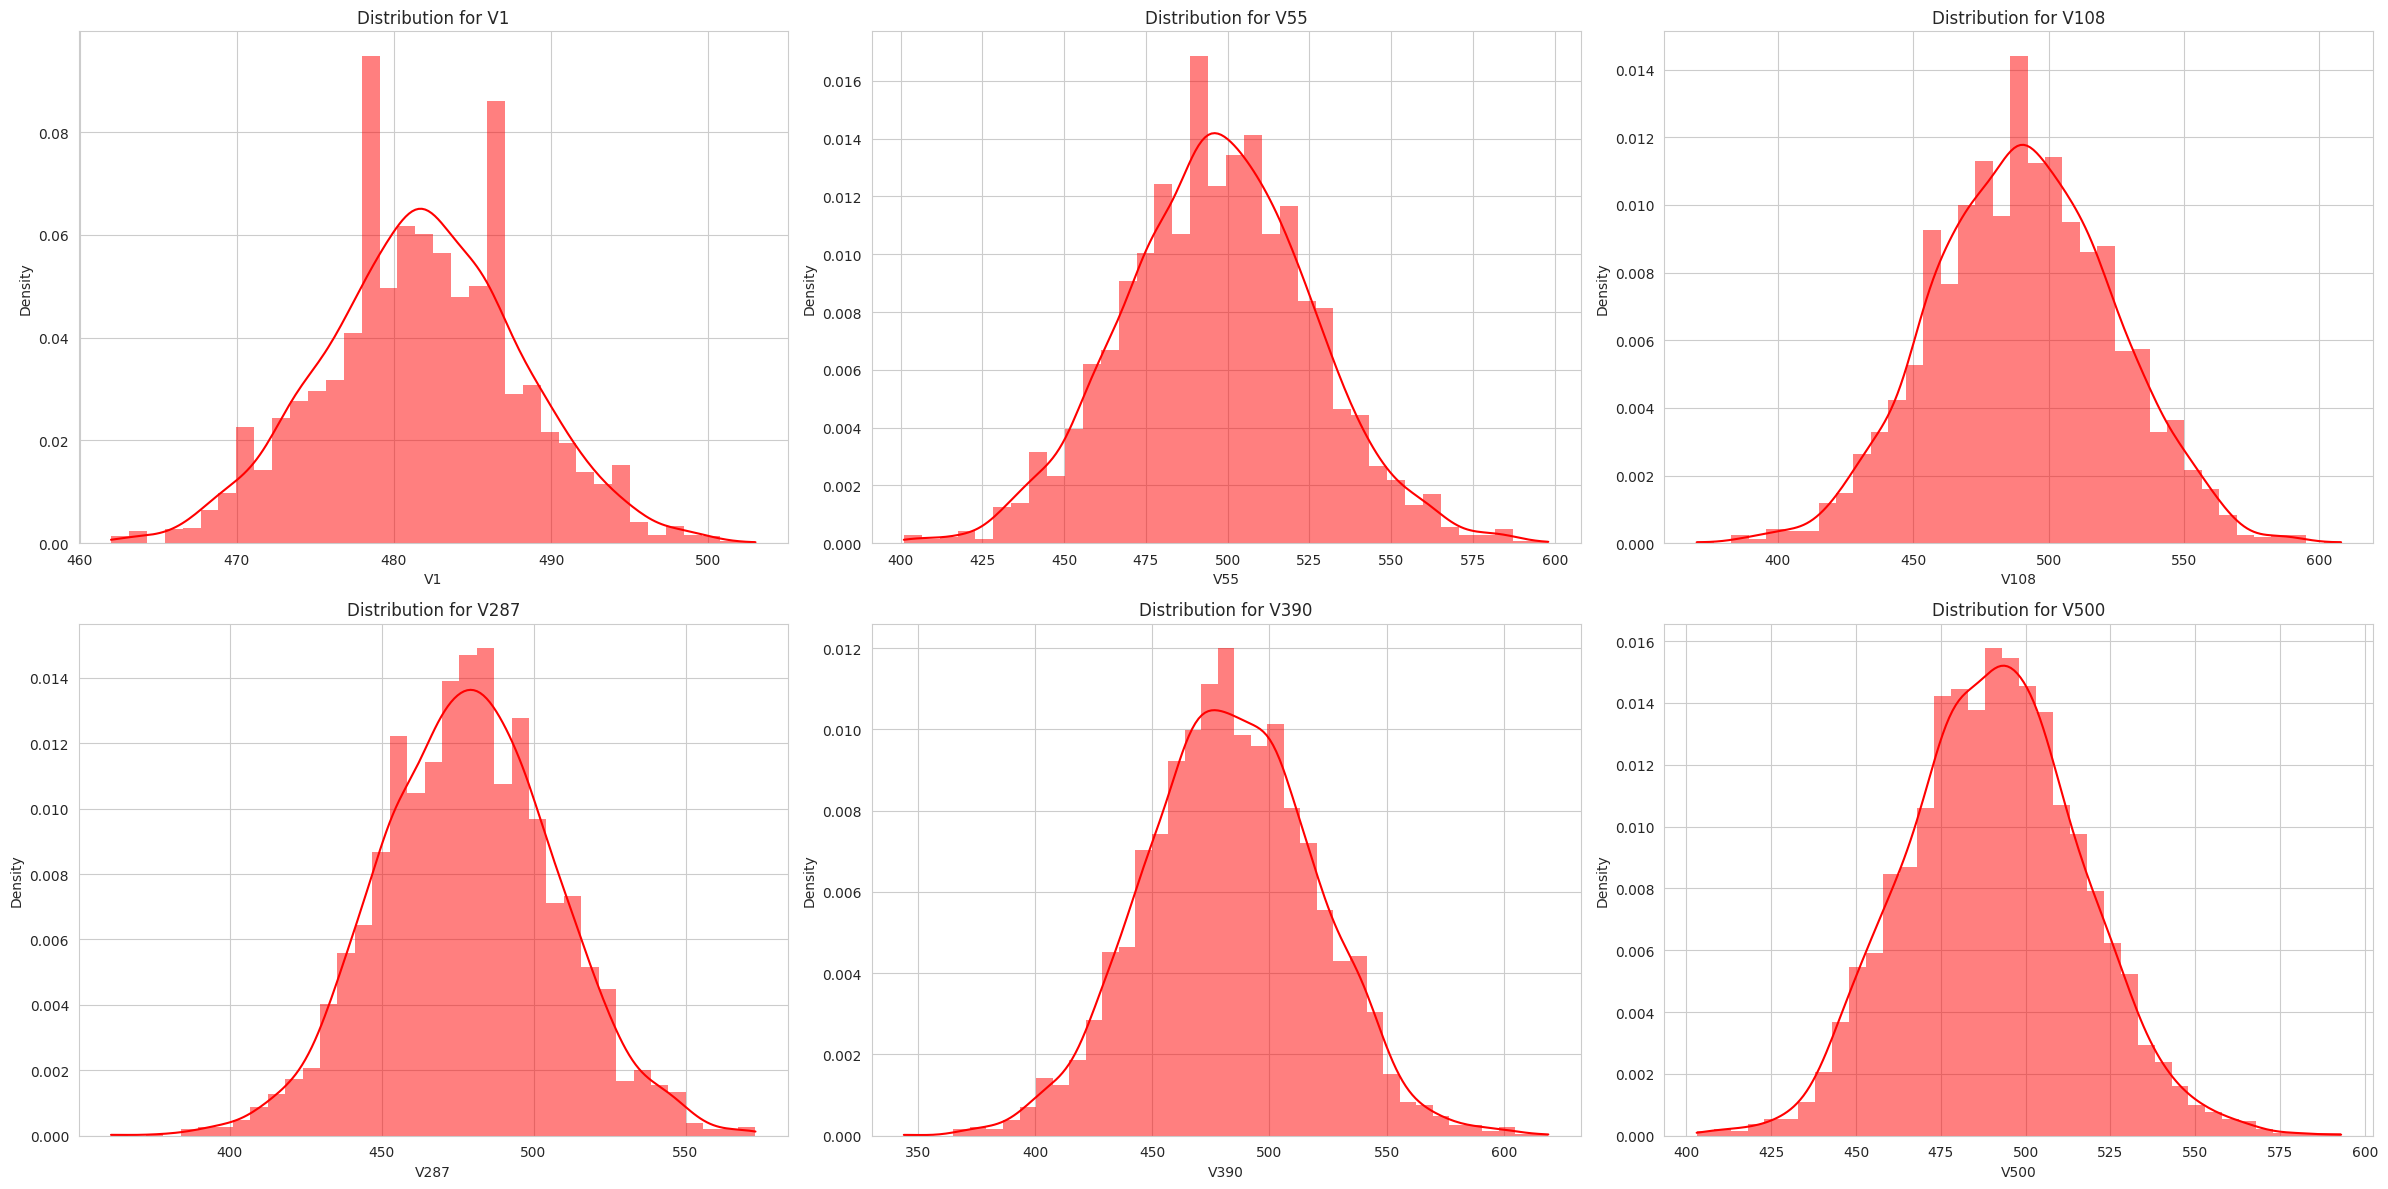

In [ ]:
# Select some features
var = ['V1', 'V55', 'V108', 'V287', 'V390', 'V500']

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Plot layout
n_rows = 2
n_cols = 3
plt.figure(figsize=(24, 12))

# Loop through the features and create a histogram for each
for i, v in enumerate(var):
  plt.subplot(n_rows, n_cols, i + 1)
  sns.histplot(madelon[v], kde=True, color='red', stat="density", linewidth=0)
  plt.title(f'Distribution for {v}')
  plt.xlabel(v)
  plt.ylabel('Density')

# Display the plots
plt.tight_layout()
plt.show()

The variables above are normally distributed and are distributed over similar ranges, but still standardized in case other variables that didn't show above are distributed over the different ranges.

### Data Preprocessing

In [ ]:
# Identify features and labels
X = madelon.drop('class', axis=1)
y = madelon['class']

# Split the data
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.transform(X_test_unscaled)

### Model Building & Evaluation

#### Logistic Regression

In [ ]:
# Logistic Regression
lr_model = LogisticRegression(random_state = 42)
lr_model.fit(X_train, y_train)

# Prediction
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

# Evaluation
lr_report = classification_report(y_test, y_pred_lr, target_names = label_encoder.classes_.astype(str))
accuracy_lr = accuracy_score(y_test, y_pred_lr)
log_loss_lr = log_loss(y_test, y_pred_proba_lr)

# Results
print('Logistics Regression Evaluation\n')
print(lr_report)
print(f'Accuracy: {accuracy_lr}\nLog Loss: {log_loss_lr}')

Logistics Regression Evaluation

              precision    recall  f1-score   support

           1       0.52      0.57      0.54       257
           2       0.54      0.49      0.51       263

    accuracy                           0.53       520
   macro avg       0.53      0.53      0.53       520
weighted avg       0.53      0.53      0.53       520

Accuracy: 0.5269230769230769
Log Loss: 0.8871714229588408


#### K-Nearest Neighbors

In [ ]:
# KNN
knn = KNeighborsClassifier()

# Find best n_neighbors by cross-validation
k_grid = {'n_neighbors': range(1, 30),
          'weights': ['uniform', 'distance'],
          'metric': ['euclidean', 'manhattan']
          }
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn_cv = GridSearchCV(knn, k_grid, cv=kf)

# Train model
knn_cv.fit(X_train, y_train)
knn_model = knn_cv.best_estimator_ # best KNN model

# Prediction
y_pred_knn = knn_model.predict(X_test)
y_pred_proba_knn = knn_model.predict_proba(X_test)[:, 1]

# Evaluation
knn_report = classification_report(y_test, y_pred_knn, target_names = label_encoder.classes_.astype(str))
accuracy_knn = accuracy_score(y_test, y_pred_knn)
log_loss_knn = log_loss(y_test, y_pred_proba_knn)

# Results
print('K-Nearest Neighbors Evaluation\n')
print(knn_report)
print(f'Accuracy: {accuracy_knn}\nLog Loss: {log_loss_knn}')

K-Nearest Neighbors Evaluation

              precision    recall  f1-score   support

           1       0.59      0.60      0.59       257
           2       0.60      0.59      0.60       263

    accuracy                           0.59       520
   macro avg       0.59      0.59      0.59       520
weighted avg       0.59      0.59      0.59       520

Accuracy: 0.5942307692307692
Log Loss: 0.6521901369936572


#### Support Vector Machine

In [ ]:
# Support Vector Machine
svm_model = SVC(probability = True, random_state = 42)
svm_model.fit(X_train, y_train)

# Prediction
y_pred_svm = svm_model.predict(X_test)
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# Evaluation
svm_report = classification_report(y_test, y_pred_svm, target_names = label_encoder.classes_.astype(str))
accuracy_svm = accuracy_score(y_test, y_pred_svm)
log_loss_svm = log_loss(y_test, y_pred_proba_svm)

# Results
print('Support Vector Machine Evaluation\n')
print(svm_report)
print(f'Accuracy: {accuracy_svm}\nLog Loss: {log_loss_svm}')

Support Vector Machine Evaluation

              precision    recall  f1-score   support

           1       0.57      0.59      0.58       257
           2       0.59      0.57      0.58       263

    accuracy                           0.58       520
   macro avg       0.58      0.58      0.58       520
weighted avg       0.58      0.58      0.58       520

Accuracy: 0.5807692307692308
Log Loss: 0.670308896480182


#### Decision Tree

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# Prediction
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Evaluation
dt_report = classification_report(y_test, y_pred_dt, target_names = label_encoder.classes_.astype(str))
accuracy_dt = accuracy_score(y_test, y_pred_dt)
log_loss_dt = log_loss(y_test, y_pred_proba_dt)

# Results
print('Decision Tree Evaluation\n')
print(dt_report)
print(f'Accuracy: {accuracy_dt}\nLog Loss: {log_loss_dt}')

Decision Tree Evaluation

              precision    recall  f1-score   support

           1       0.69      0.75      0.72       257
           2       0.73      0.66      0.70       263

    accuracy                           0.71       520
   macro avg       0.71      0.71      0.71       520
weighted avg       0.71      0.71      0.71       520

Accuracy: 0.7076923076923077
Log Loss: 0.5694749089582992


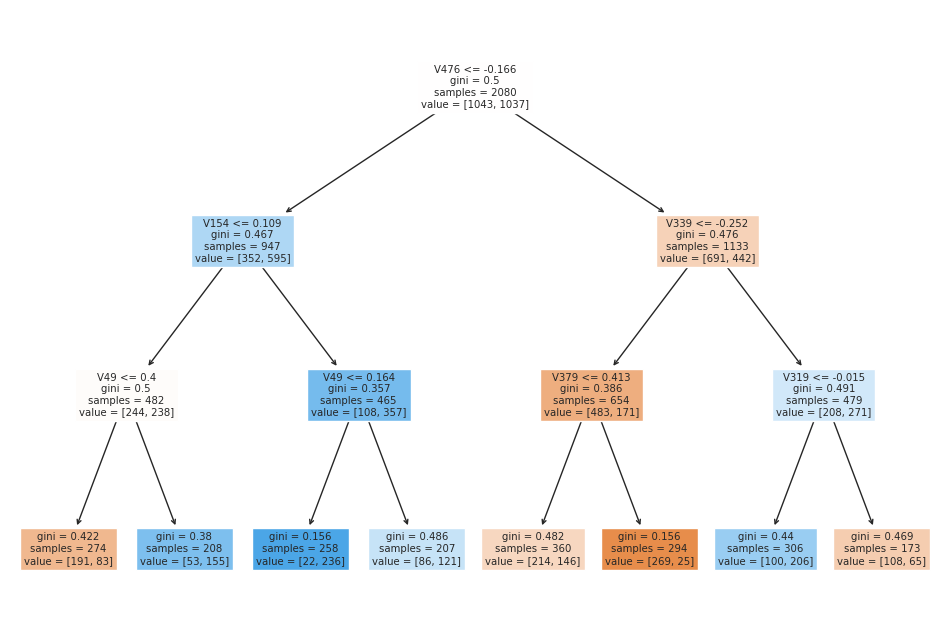

In [ ]:
# Visualize Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names = X.columns.tolist())
plt.show()

#### Random Forest

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state = 42)

# Train model
rf_model.fit(X_train, y_train)

# Prediction
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
rf_report = classification_report(y_test, y_pred_rf, target_names = label_encoder.classes_.astype(str))
accuracy_rf = accuracy_score(y_test, y_pred_rf)
log_loss_rf = log_loss(y_test, y_pred_proba_rf)

# Results
print('Random Forest Evaluation\n')
print(rf_report)
print(f'Accuracy: {accuracy_rf}\nLog Loss: {log_loss_rf}')

Random Forest Evaluation

              precision    recall  f1-score   support

           1       0.72      0.68      0.70       257
           2       0.71      0.74      0.72       263

    accuracy                           0.71       520
   macro avg       0.71      0.71      0.71       520
weighted avg       0.71      0.71      0.71       520

Accuracy: 0.7115384615384616
Log Loss: 0.6010568482880678


#### AdaBoost

In [ ]:
# AdaBoost
ab_model = AdaBoostClassifier(random_state = 42)
ab_model.fit(X_train, y_train)

# Prediction
y_pred_ab = ab_model.predict(X_test)
y_pred_proba_ab = ab_model.predict_proba(X_test)[:, 1]

# Evaluation
ab_report = classification_report(y_test, y_pred_ab, target_names = label_encoder.classes_.astype(str))
accuracy_ab = accuracy_score(y_test, y_pred_ab)
log_loss_ab = log_loss(y_test, y_pred_proba_ab)

# Results
print('AdaBoost Evaluation\n')
print(ab_report)
print(f'Accuracy: {accuracy_ab}\nLog Loss: {log_loss_ab}')

AdaBoost Evaluation

              precision    recall  f1-score   support

           1       0.62      0.61      0.62       257
           2       0.63      0.63      0.63       263

    accuracy                           0.62       520
   macro avg       0.62      0.62      0.62       520
weighted avg       0.62      0.62      0.62       520

Accuracy: 0.6230769230769231
Log Loss: 0.6893269283986923


#### XGBoost

In [ ]:
# XGBoost
xgb_grid = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 0.29),
    'max_depth': randint(3, 10),
    'colsample_bytree': uniform(0.5, 1),
    'min_child_weight': randint(1, 5),
    'subsample': uniform(0.5, 0.5),
    'gamma': uniform(0, 0.4),
    'reg_alpha': uniform(0, 40),
    'reg_lambda': uniform(0, 1)
}

xgb_cv = RandomizedSearchCV(
    XGBClassifier(objective='binary:logistic'), # binary classification
    param_distributions = xgb_grid,
    n_iter = 100,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5,
    verbose = 3,
    random_state = 42
)

# Train model
xgb_cv.fit(X_train, y_train)
xgb_model = xgb_cv.best_estimator_ # best XGBoost model

# Prediction
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation
xgb_report = classification_report(y_test, y_pred_xgb, target_names = label_encoder.classes_.astype(str))
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
log_loss_xgb = log_loss(y_test, y_pred_proba_xgb)

# Results
print('XGBoost Evaluation\n')
print(xgb_report)
print(f'Accuracy: {accuracy_xgb}\nLog Loss: {log_loss_xgb}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
XGBoost Evaluation

              precision    recall  f1-score   support

           1       0.85      0.82      0.84       257
           2       0.83      0.86      0.85       263

    accuracy                           0.84       520
   macro avg       0.84      0.84      0.84       520
weighted avg       0.84      0.84      0.84       520

Accuracy: 0.8423076923076923
Log Loss: 0.3840337814357699


#### Neural Network

In [ ]:
# Neural Network
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Build model
neural_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]), # add layers
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
neural_model.compile(loss='binary_crossentropy', # for binary classification
              optimizer='adam',
              metrics=['accuracy'])

# Train model
history_neural = neural_model.fit(X_train, y_train, epochs = 10,
                                  batch_size = 32, verbose = 1)

Epoch 1/10
65/65 [==============================] - 1s 2ms/step - loss: 0.7023 - accuracy: 0.5649
Epoch 2/10
65/65 [==============================] - 0s 2ms/step - loss: 0.5216 - accuracy: 0.7837
Epoch 3/10
65/65 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8784
Epoch 4/10
65/65 [==============================] - 0s 2ms/step - loss: 0.2618 - accuracy: 0.9356
Epoch 5/10
65/65 [==============================] - 0s 2ms/step - loss: 0.1540 - accuracy: 0.9841
Epoch 6/10
65/65 [==============================] - 0s 2ms/step - loss: 0.0785 - accuracy: 0.9962
Epoch 7/10
65/65 [==============================] - 0s 2ms/step - loss: 0.0380 - accuracy: 1.0000
Epoch 8/10
65/65 [==============================] - 0s 2ms/step - loss: 0.0180 - accuracy: 1.0000
Epoch 9/10
65/65 [==============================] - 0s 2ms/step - loss: 0.0101 - accuracy: 1.0000
Epoch 10/10
65/65 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 1.0000


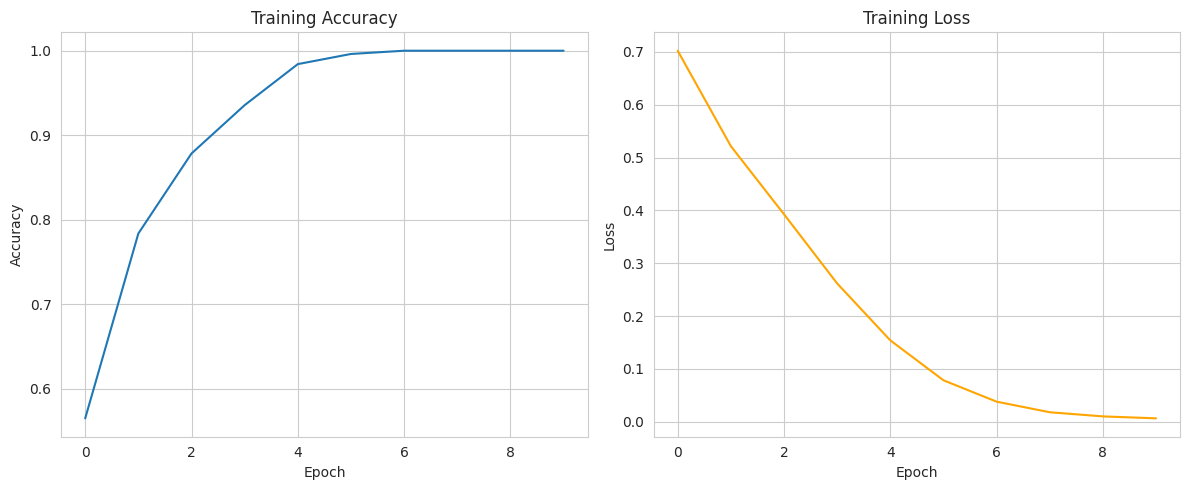

In [ ]:
# Traning Accuracy and Loss Visualization
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history_neural.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_neural.history['loss'], color = 'orange')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

In [ ]:
# Prediction
y_pred_proba_neural = neural_model.predict(X_test).flatten()
y_pred_neural = (y_pred_proba_neural > 0.5).astype(int)

# Evaluation
neural_report = classification_report(y_test, y_pred_neural, target_names = label_encoder.classes_.astype(str))
log_loss_neural = log_loss(y_test, y_pred_proba_neural)
accuracy_neural = accuracy_score(y_test, y_pred_neural)

# Results
print('Neural Network Evaluation\n')
print(neural_report)
print(f'Accuracy: {accuracy_neural}\nLog Loss: {log_loss_neural}')

17/17 [==============================] - 0s 2ms/step
Neural Network Evaluation

              precision    recall  f1-score   support

           1       0.57      0.58      0.58       257
           2       0.58      0.57      0.57       263

    accuracy                           0.57       520
   macro avg       0.58      0.58      0.57       520
weighted avg       0.58      0.57      0.57       520

Accuracy: 0.575
Log Loss: 1.6150903453865455


### Model Selection

#### ROC Curve

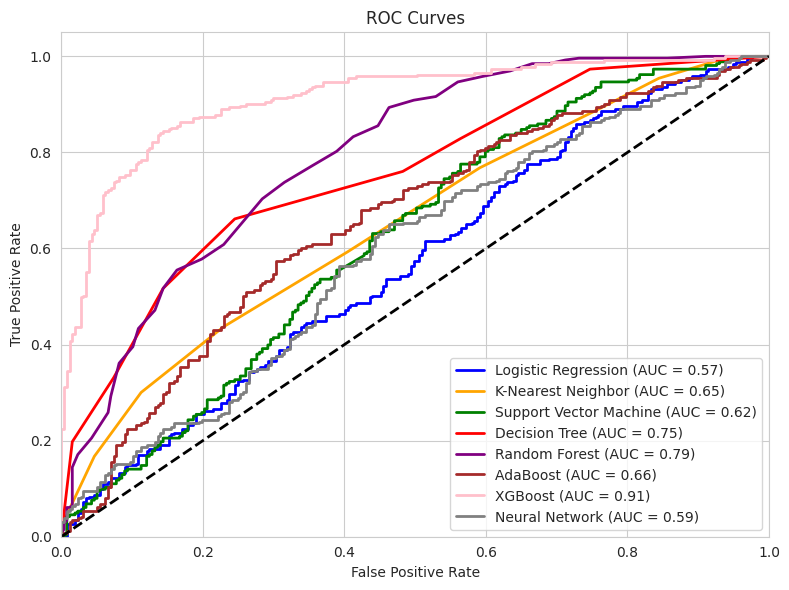

In [ ]:
# Setup plot
fig, ax = plt.subplots(figsize=(8, 6))
colors = cycle(['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray'])
model_predictions = [
    (y_pred_proba_lr, 'Logistic Regression'),
    (y_pred_proba_knn, 'K-Nearest Neighbor'),
    (y_pred_proba_svm, 'Support Vector Machine'),
    (y_pred_proba_dt, 'Decision Tree'),
    (y_pred_proba_rf, 'Random Forest'),
    (y_pred_proba_ab, 'AdaBoost'),
    (y_pred_proba_xgb, 'XGBoost'),
    (y_pred_proba_neural, 'Neural Network')
]

# Plot ROC curve for each model
for model_proba, title in model_predictions:
    fpr, tpr, _ = roc_curve(y_test, model_proba)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, color=next(colors), lw=2, label=f'{title} (AUC = {roc_auc:.2f})')

ax.plot([0, 1], [0, 1], 'k--', lw=2)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves')
ax.legend(loc="lower right")

# Display the plot
plt.tight_layout()
plt.show()

XGBoost has the highest ROC AUC score, and it's significantly higher than other models' scores.

#### Performance Metrics

In [ ]:
# Model names
model = ['Logistic Regression', 'K-Nearest Neighbor', 'Support Vector Machine',
         'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost', 'Neural Network']

# Performance metrics
performance = {
    'Accuracy': [accuracy_lr, accuracy_knn, accuracy_svm, accuracy_dt,
                 accuracy_rf, accuracy_ab, accuracy_xgb, accuracy_neural],
    'Log Loss': [log_loss_lr, log_loss_knn, log_loss_svm, log_loss_dt,
                 log_loss_rf, log_loss_ab, log_loss_xgb, log_loss_neural],
    'ROC AUC': [
        roc_auc_score(y_test, y_pred_proba_lr),
        roc_auc_score(y_test, y_pred_proba_knn),
        roc_auc_score(y_test, y_pred_proba_svm),
        roc_auc_score(y_test, y_pred_proba_dt),
        roc_auc_score(y_test, y_pred_proba_rf),
        roc_auc_score(y_test, y_pred_proba_ab),
        roc_auc_score(y_test, y_pred_proba_xgb),
        roc_auc_score(y_test, y_pred_proba_neural)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_knn),
        precision_score(y_test, y_pred_svm),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_ab),
        precision_score(y_test, y_pred_xgb),
        precision_score(y_test, y_pred_neural)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_knn),
        recall_score(y_test, y_pred_svm),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_ab),
        recall_score(y_test, y_pred_xgb),
        recall_score(y_test, y_pred_neural)
    ],
    'F1 Score (macro)': [
        f1_score(y_test, y_pred_lr, average='macro'),
        f1_score(y_test, y_pred_knn, average='macro'),
        f1_score(y_test, y_pred_svm, average='macro'),
        f1_score(y_test, y_pred_dt, average='macro'),
        f1_score(y_test, y_pred_rf, average='macro'),
        f1_score(y_test, y_pred_ab, average='macro'),
        f1_score(y_test, y_pred_xgb, average='macro'),
        f1_score(y_test, y_pred_neural, average='macro')
    ],
    'F1 Score (micro)': [
        f1_score(y_test, y_pred_lr, average='micro'),
        f1_score(y_test, y_pred_knn, average='micro'),
        f1_score(y_test, y_pred_svm, average='micro'),
        f1_score(y_test, y_pred_dt, average='micro'),
        f1_score(y_test, y_pred_rf, average='micro'),
        f1_score(y_test, y_pred_ab, average='micro'),
        f1_score(y_test, y_pred_xgb, average='micro'),
        f1_score(y_test, y_pred_neural, average='micro')
    ],
    'F1 Score (weighted)': [
        f1_score(y_test, y_pred_lr, average='weighted'),
        f1_score(y_test, y_pred_knn, average='weighted'),
        f1_score(y_test, y_pred_svm, average='weighted'),
        f1_score(y_test, y_pred_dt, average='weighted'),
        f1_score(y_test, y_pred_rf, average='weighted'),
        f1_score(y_test, y_pred_ab, average='weighted'),
        f1_score(y_test, y_pred_xgb, average='weighted'),
        f1_score(y_test, y_pred_neural, average='weighted')
    ]
}

performance_df = pd.DataFrame(performance, index=model).sort_values(by=['ROC AUC'], ascending=False)
print(performance_df)

                        Accuracy  Log Loss   ROC AUC  Precision    Recall  \
XGBoost                 0.842308  0.384034  0.912740   0.831502  0.863118   
Random Forest           0.711538  0.601057  0.792398   0.705455  0.737643   
Decision Tree           0.707692  0.569475  0.754331   0.734177  0.661597   
AdaBoost                0.623077  0.689327  0.655753   0.626415  0.631179   
K-Nearest Neighbor      0.594231  0.652190  0.651019   0.600000  0.593156   
Support Vector Machine  0.580769  0.670309  0.619654   0.587549  0.574144   
Neural Network          0.575000  1.615090  0.591159   0.582031  0.566540   
Logistic Regression     0.526923  0.887171  0.570105   0.535565  0.486692   

                        F1 Score (macro)  F1 Score (micro)  \
XGBoost                         0.842158          0.842308   
Random Forest                   0.711192          0.711538   
Decision Tree                   0.707259          0.707692   
AdaBoost                        0.622988          0.623077

**XGBoost** is the best model based on the performance metrics.

### Feature Evaluation

In [ ]:
# Convert X_train, X_test to dataframe for LIME and SHAP
X_train_df = pd.DataFrame(X_train, columns=madelon.drop('class', axis=1).columns)
X_test_df = pd.DataFrame(X_test, columns=madelon.drop('class', axis=1).columns)

#### LIME

In [ ]:
# Create a LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data = X_train_df.values,
    feature_names = X_train_df.columns.tolist(),
    class_names = label_encoder.classes_,
    mode = 'classification'
)

# LIME Explaination (only show 1 instance as example since there are a lot features displayed)
explanation = lime_explainer.explain_instance(X_test_df.values[22], xgb_model.predict_proba, num_features=len(X_train_df.columns))
explanation.show_in_notebook(show_table=True, show_all=False)

In [ ]:
n = X_test_df.shape[0]
feature_score_lime = {feature: 0 for feature in X_train_df.columns}

for i in range(n):
  explanation = lime_explainer.explain_instance(X_test_df.values[i], xgb_model.predict_proba, num_features=len(X_train_df.columns))
  exp_list = explanation.as_list()

  for tup in exp_list:
    feature, score = tup[0], tup[1]

    # Get total influential score for each feature
    for key, value in feature_score_lime.items():
      if key in feature:
        feature_score_lime[key] += abs(score)

# Get average influential value
for key, value in feature_score_lime.items():
  feature_score_lime[key] /= n

# Sort the dictionary by values
sorted_feature_lime = sorted(feature_score_lime.items(), key=lambda x: x[1])

# Create a DataFrame to display the result
df_feature_lime = pd.DataFrame(sorted_feature_lime, columns=['Feature', 'Score'])
df_feature_lime.head(10)

,Feature,Score
0,V229,0.004177
1,V73,0.004184
2,V255,0.004243
3,V172,0.004255
4,V118,0.004255
5,V441,0.004266
6,V448,0.004271
7,V146,0.004284
8,V160,0.004289
9,V167,0.004293


#### SHAP

In [ ]:
# Initialize Explainer
shap_explainer = shap.TreeExplainer(xgb_model, X_train)

# Compute SHAP values for the test set
shap_values = shap_explainer.shap_values(X_test)

# Randomly select 3 instance for showing
indices = np.random.choice(X_test_df.shape[0], size=3, replace=False)

shap.initjs()
for i in indices:
    print(f"Index: {i}")
    explainer_value = shap_explainer.expected_value
    shap_values_instance = shap_values[i, :]

    plot = shap.force_plot(explainer_value, shap_values_instance, X_test_df.iloc[i, :], link="logit", show=False)
    display(plot)

 90%|==================  | 469/520 [00:12<00:01]       

Index: 467


Index: 363


Index: 43


**General Interpretation**\
f(x): The base value, which indicates the average model output (probability) over the training set for certain class.\
Red arrows: Indicate feature values that push the prediction higher than the base value for a given class.\
Blue arrows: Indicate feature values that pull the prediction lower than the base value for that class.\
Length of arrows: Represents the magnitude of the feature's contribution to the prediction.\
Position of the feature label: Indicates the actual value of that feature for the instance being explained.\
The output value for the prediction is the final position on the x-axis after all the feature contributions have been taken into account. If it is greater than the base value, the model predicts that this instance is more likely to be in that class; if it is less, it predicts it is less likely to be in the class.

In [ ]:
# Convert the list of SHAP values for each class into an array
shap_values_array = np.stack(shap_values, axis=1)

# Compute the mean of the absolute SHAP values across the selected instances for each feature
mean_abs_shap_values = np.abs(shap_values_array).mean(axis=0)
if mean_abs_shap_values.ndim > 1:
    mean_abs_shap_values = mean_abs_shap_values.mean(axis=1)

# Create a dictionary for feature scores
feature_score_shap = {feature: mean_abs_shap_values[idx] for idx, feature in enumerate(X_train_df.columns)}
sorted_feature_shap = sorted(feature_score_shap.items(), key=lambda x: x[1])

# Create a DataFrame to display the result
df_feature_shap = pd.DataFrame(sorted_feature_shap, columns=['Feature', 'Score'])
df_feature_shap.head(10)

,Feature,Score
0,V172,0.010654
1,V128,0.011263
2,V373,0.011413
3,V445,0.011455
4,V92,0.011642
5,V160,0.011732
6,V18,0.011796
7,V38,0.011819
8,V6,0.011856
9,V114,0.011942


### Model Optimization

#### After LIME

In [ ]:
# Drop non-influential features
drop_features_lime = ['V229', 'V73', 'V255', 'V172', 'V118',
                      'V441', 'V448', 'V146', 'V160', 'V167']
X_train_lime = X_train_df.drop(columns = drop_features_lime)
X_test_lime = X_test_df.drop(columns = drop_features_lime)

# Retrain XGBoost
# Extract the best parameters from the previous fitting
best_params_xgb = xgb_cv.best_params_
lime_model = XGBClassifier(**best_params_xgb, objective='binary:logistic')
lime_model.fit(X_train_lime, y_train)

# Prediction
y_pred_lime = lime_model.predict(X_test_lime)
y_pred_proba_lime = lime_model.predict_proba(X_test_lime)[:, 1]

# Evaluation
lime_report = classification_report(y_test, y_pred_lime, target_names = label_encoder.classes_.astype(str))
accuracy_lime = accuracy_score(y_test, y_pred_lime)
log_loss_lime = log_loss(y_test, y_pred_proba_lime)

# Results
print('XGBoost Evaluation (LIME)\n')
print(lime_report)
print(f'Accuracy: {accuracy_lime}\nLog Loss: {log_loss_lime}')

XGBoost Evaluation (LIME)

              precision    recall  f1-score   support

           1       0.85      0.84      0.84       257
           2       0.85      0.85      0.85       263

    accuracy                           0.85       520
   macro avg       0.85      0.85      0.85       520
weighted avg       0.85      0.85      0.85       520

Accuracy: 0.8461538461538461
Log Loss: 0.36770122205706673


#### After SHAP

In [ ]:
# Drop the identified non-influential features from the training and test sets
drop_features_shap = ['V172', 'V128', 'V373', 'V445', 'V92']
X_train_shap = X_train_df.drop(columns=drop_features_shap)
X_test_shap = X_test_df.drop(columns=drop_features_shap)

# Retrain XGBoost
shap_model = XGBClassifier(**best_params_xgb, objective='binary:logistic')
shap_model.fit(X_train_shap, y_train)

# Make predictions with the updated model on the reduced feature test set
y_pred_shap = shap_model.predict(X_test_shap)
y_pred_proba_shap = shap_model.predict_proba(X_test_shap)[:, 1]

# Generate a classification report
shap_report = classification_report(y_test, y_pred_shap, target_names = label_encoder.classes_.astype(str))

# Calculate accuracy and log loss
accuracy_shap = accuracy_score(y_test, y_pred_shap)
log_loss_shap = log_loss(y_test, y_pred_proba_shap)

# Print results
print('XGBoost Evaluation (SHAP-Informed Model)\n')
print(shap_report)
print(f'Accuracy: {accuracy_shap}\nLog Loss: {log_loss_shap}')

XGBoost Evaluation (SHAP-Informed Model)

              precision    recall  f1-score   support

           1       0.84      0.87      0.86       257
           2       0.87      0.84      0.86       263

    accuracy                           0.86       520
   macro avg       0.86      0.86      0.86       520
weighted avg       0.86      0.86      0.86       520

Accuracy: 0.8557692307692307
Log Loss: 0.36500513730679


### Comparison

#### ROC Curve

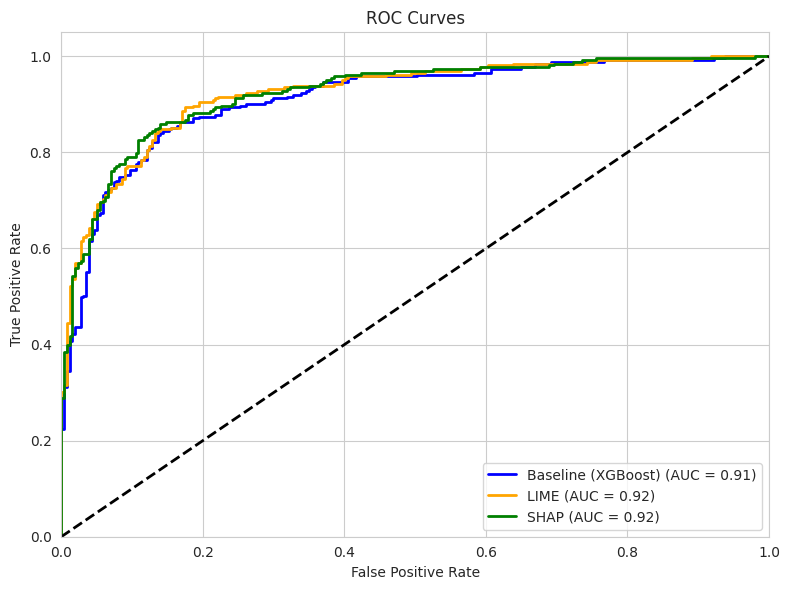

In [ ]:
# Setup plot
fig, ax = plt.subplots(figsize=(8, 6))
colors = cycle(['blue', 'orange', 'green'])
eml_predictions = [
    (y_pred_proba_xgb, 'Baseline (XGBoost)'),
    (y_pred_proba_lime, 'LIME'),
    (y_pred_proba_shap, 'SHAP')
]

# Plot ROC curve for each model
for model_proba, title in eml_predictions:
    fpr, tpr, _ = roc_curve(y_test, model_proba)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, color=next(colors), lw=2, label=f'{title} (AUC = {roc_auc:.2f})')

ax.plot([0, 1], [0, 1], 'k--', lw=2)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves')
ax.legend(loc="lower right")

# Display the plot
plt.tight_layout()
plt.show()

#### Performance Metrics

In [ ]:
# Index
eml_index = ['Baseline (XGBoost)', 'LIME', 'SHAP']

# Performance metrics
performance_eml = {
    'Accuracy': [accuracy_xgb, accuracy_lime, accuracy_shap],
    'Log Loss': [log_loss_xgb, log_loss_lime, log_loss_shap],
    'ROC AUC': [
        roc_auc_score(y_test, y_pred_proba_xgb),
        roc_auc_score(y_test, y_pred_proba_lime),
        roc_auc_score(y_test, y_pred_proba_shap)
    ],
    'Precision': [
        precision_score(y_test, y_pred_xgb),
        precision_score(y_test, y_pred_lime),
        precision_score(y_test, y_pred_shap)
    ],
    'Recall': [
        recall_score(y_test, y_pred_xgb),
        recall_score(y_test, y_pred_lime),
        recall_score(y_test, y_pred_shap)
    ],
    'F1 Score (macro)': [
        f1_score(y_test, y_pred_xgb, average='macro'),
        f1_score(y_test, y_pred_lime, average='macro'),
        f1_score(y_test, y_pred_shap, average='macro')
    ],
    'F1 Score (micro)': [
        f1_score(y_test, y_pred_xgb, average='micro'),
        f1_score(y_test, y_pred_lime, average='micro'),
        f1_score(y_test, y_pred_shap, average='micro')
    ],
    'F1 Score (weighted)': [
        f1_score(y_test, y_pred_xgb, average='weighted'),
        f1_score(y_test, y_pred_lime, average='weighted'),
        f1_score(y_test, y_pred_shap, average='weighted')
    ]
}

eml_compare = pd.DataFrame(performance_eml, index=eml_index).sort_values(by=['Accuracy'], ascending=False)
print(eml_compare)

                    Accuracy  Log Loss   ROC AUC  Precision    Recall  \
SHAP                0.855769  0.365005  0.923777   0.867188  0.844106   
LIME                0.846154  0.367701  0.923289   0.845283  0.851711   
Baseline (XGBoost)  0.842308  0.384034  0.912740   0.831502  0.863118   

                    F1 Score (macro)  F1 Score (micro)  F1 Score (weighted)  
SHAP                        0.855769          0.855769             0.855765  
LIME                        0.846117          0.846154             0.846145  
Baseline (XGBoost)          0.842158          0.842308             0.842214  


### Summary Plot

PermutationExplainer explainer: 521it [21:21,  2.47s/it]


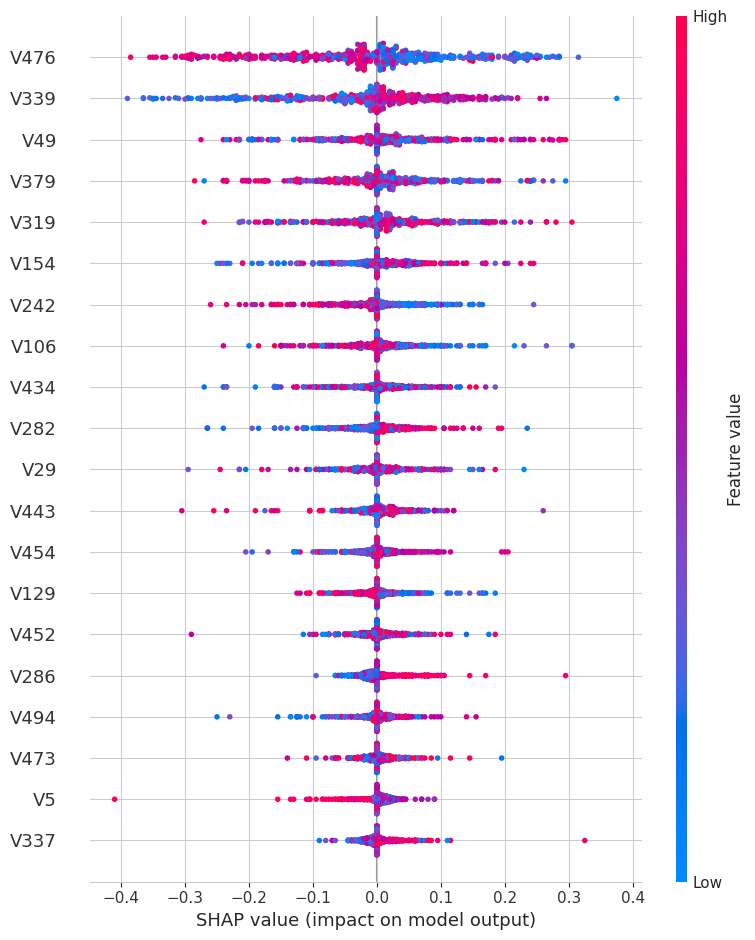

In [ ]:
# Summary Plot for SHAP
class SHAPModelEvaluator:
    def __init__(self, model, X_train, X_test, y_train, drop_features):
        self.model = model
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.drop_features = drop_features

    def generate_summary_plot(self):
        # Reduce the feature set based on SHAP feature importance
        X_train_shap = self.X_train.drop(columns=self.drop_features)
        X_test_shap = self.X_test.drop(columns=self.drop_features)

        # Fit the model on the reduced feature set
        self.model.fit(X_train_shap, self.y_train)

        # Create a SHAP explainer
        num_features = X_train_shap.shape[1]
        min_evals = 2 * num_features + 1
        explainer = shap.Explainer(self.model.predict, X_train_shap, max_evals=max(min_evals, 1000))

        # Calculate SHAP values for the test set
        shap_values = explainer(X_test_shap)

        # Generate summary plot
        shap.summary_plot(shap_values, X_test_shap)

evaluator = SHAPModelEvaluator(shap_model, X_train_df, X_test_df, y_train, drop_features_shap)

# Generate and display the summary plot
evaluator.generate_summary_plot()